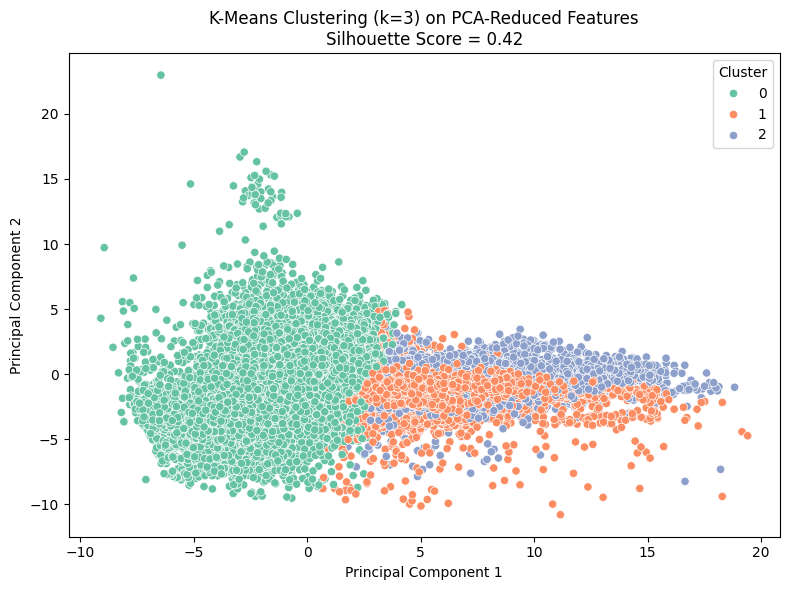

In [2]:
# Pilot run for unsupervised learning using k-Means
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the CSV file
file_path = "assignTTSWING.csv"
df = pd.read_csv(file_path)

# Filter only feature columns (exclude metadata and IDs)
feature_columns = [col for col in df.columns if col.startswith(('a_', 'g_', 'ax_', 'ay_', 'az_', 'gx_', 'gy_', 'gz_'))]
features = df[feature_columns]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Run k-means with a guessed number of clusters (e.g., 3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Evaluate clustering with silhouette score
sil_score = silhouette_score(X_scaled, cluster_labels)

# Prepare dataframe for plotting
pca_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': cluster_labels
})

# Plot PCA-reduced features colored by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title(f'K-Means Clustering (k={k}) on PCA-Reduced Features\nSilhouette Score = {sil_score:.2f}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()
